In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TaxiFare.csv')

In [3]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734371,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


In [6]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
data['date_time_of_pickup']=pd.to_datetime(data['date_time_of_pickup'],format='%Y-%m-%d %H:%M:%S UTC')

In [8]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
data['pickup_date']= data['date_time_of_pickup'].dt.date
data['pickup_day']=data['date_time_of_pickup'].apply(lambda x:x.day)
data['pickup_hour']=data['date_time_of_pickup'].apply(lambda x:x.hour)
data['pickup_day_of_week']=data['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
data['pickup_month']=data['date_time_of_pickup'].apply(lambda x:x.month)
data['pickup_year']=data['date_time_of_pickup'].apply(lambda x:x.year)
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [10]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

In [11]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.longitude_of_dropoff - df.longitude_of_pickup).abs()
    df['abs_diff_latitude'] = (df.latitude_of_dropoff - df.latitude_of_pickup).abs()

add_travel_vector_features(data)

In [12]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,abs_diff_longitude,abs_diff_latitude
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.002701,0.009041
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,0.036780,0.070701
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.008504,0.010708
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,0.004437,0.024949
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,0.011440,0.015754


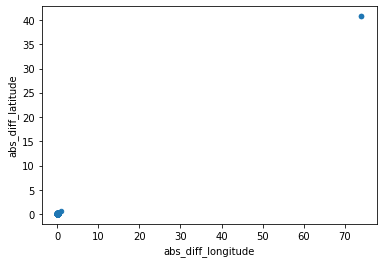

In [13]:
plot = data.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')


In [14]:
data2 = data[(data.abs_diff_longitude < 0.25) & (data.abs_diff_latitude < 0.25)]

In [15]:
data2.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,abs_diff_longitude,abs_diff_latitude
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.002701,0.009041
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,0.036780,0.070701
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.008504,0.010708
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,0.004437,0.024949
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,0.011440,0.015754


In [16]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [17]:
data2['trip_distance']=data2.apply(lambda row:distance(row['latitude_of_pickup'],row['latitude_of_dropoff'],row['longitude_of_pickup'],row['longitude_of_dropoff']),axis=1)

<ipython-input-17-e9e641feee06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['trip_distance']=data2.apply(lambda row:distance(row['latitude_of_pickup'],row['latitude_of_dropoff'],row['longitude_of_pickup'],row['longitude_of_dropoff']),axis=1)


In [18]:
data2.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,abs_diff_longitude,abs_diff_latitude,trip_distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.002701,0.009041,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,0.036780,0.070701,5.250670
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.008504,0.010708,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,0.004437,0.024949,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,0.011440,0.015754,1.242218


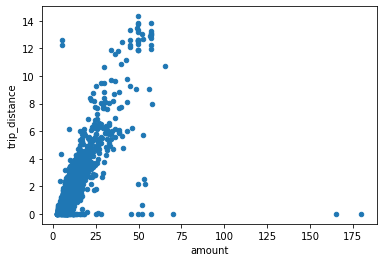

In [19]:
plot = data2.iloc[:2000].plot.scatter('amount', 'trip_distance')

<AxesSubplot:xlabel='amount', ylabel='trip_distance'>

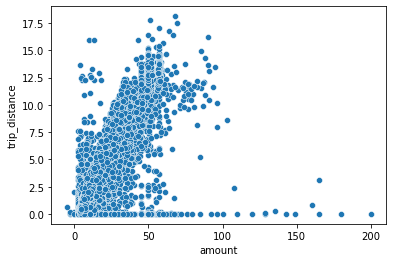

In [20]:
sns.scatterplot(x="amount", y="trip_distance", data=data2)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year,abs_diff_longitude,abs_diff_latitude,trip_distance
count,48409.000000,48409.000000,48409.000000,48409.000000,48409.000000,48409.000000,48409.000000,48409.000000,48409.000000,48409.00000,48409.000000,48409.000000,48409.000000
mean,11.337380,-73.927532,40.704184,-73.926276,40.704706,1.670867,15.670247,13.486087,6.275445,2011.74480,0.022992,0.021483,2.084507
std,9.473567,2.321823,2.287549,2.321974,2.287659,1.292137,8.659222,6.504478,3.461098,1.86658,0.033663,0.022701,2.207316
min,-5.000000,-75.414728,-74.006893,-75.354559,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000,0.000000,0.000000,0.000045
25%,6.000000,-73.992317,40.736500,-73.991333,40.735877,1.000000,8.000000,9.000000,3.000000,2010.00000,0.006303,0.007152,0.800002
50%,8.500000,-73.982138,40.753422,-73.980505,40.754122,1.000000,16.000000,14.000000,6.000000,2012.00000,0.012942,0.014424,1.356717
75%,12.500000,-73.968512,40.767761,-73.965469,40.768492,2.000000,23.000000,19.000000,9.000000,2013.00000,0.024388,0.027512,2.464458
max,200.000000,40.783472,42.160275,40.851027,42.168717,6.000000,31.000000,23.000000,12.000000,2015.00000,0.244985,0.241100,18.132141


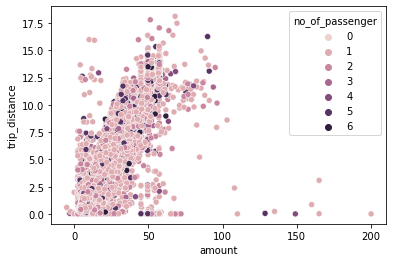

In [21]:
data3=data2.loc[data2['trip_distance']>0]
ax = sns.scatterplot(x="amount", y="trip_distance",hue="no_of_passenger", data=data3)
data3.describe()

In [22]:
data3.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'pickup_date', 'pickup_day', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'pickup_year',
       'abs_diff_longitude', 'abs_diff_latitude', 'trip_distance'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount', ylabel='trip_distance'>

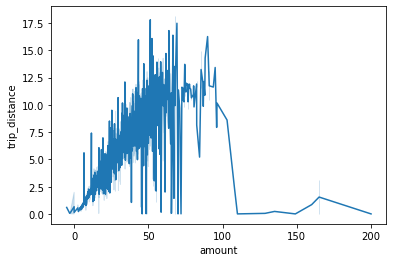

In [23]:
sns.lineplot(data3['amount'],data3['trip_distance'])

**as the distance increases the amount of fare is aslo increasing but at certain distance it remains constant**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_day_of_week', ylabel='count'>

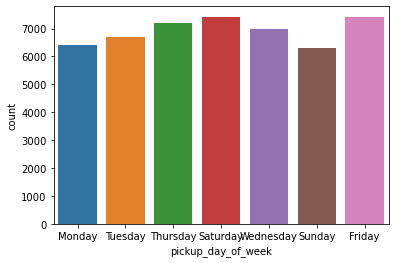

In [24]:
sns.countplot(data3['pickup_day_of_week'])

**most of the pickups are on Saturday ans Friday**

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

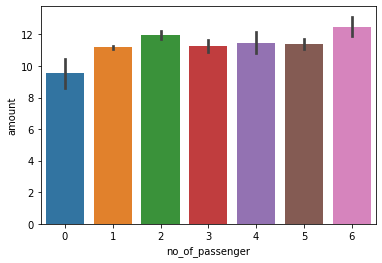

In [25]:
sns.barplot(x = data3['no_of_passenger'], y = data['amount'])

**from the above graph it is clearly seems to be that as the num of passenger increases the fare is also increases**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

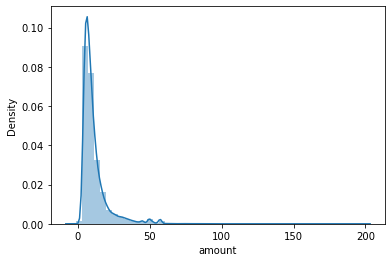

In [26]:
sns.distplot(data3['amount'])

**from the above graph it is seen that Data is not properly distributed**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_year', ylabel='count'>

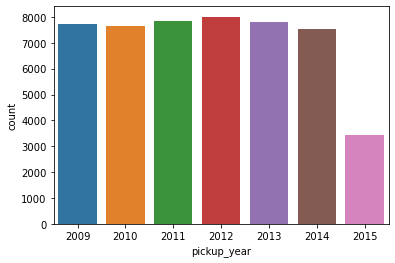

In [27]:
sns.countplot(data['pickup_year'])

**most of the pickups were happend in 2012**

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

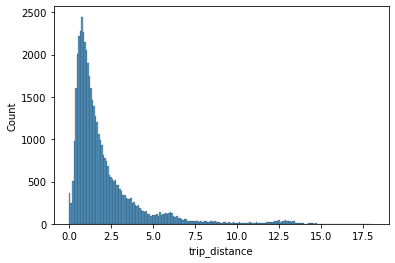

In [28]:
sns.histplot(data3['trip_distance'])

**DAta is negatively skewed.... need more data for better model**

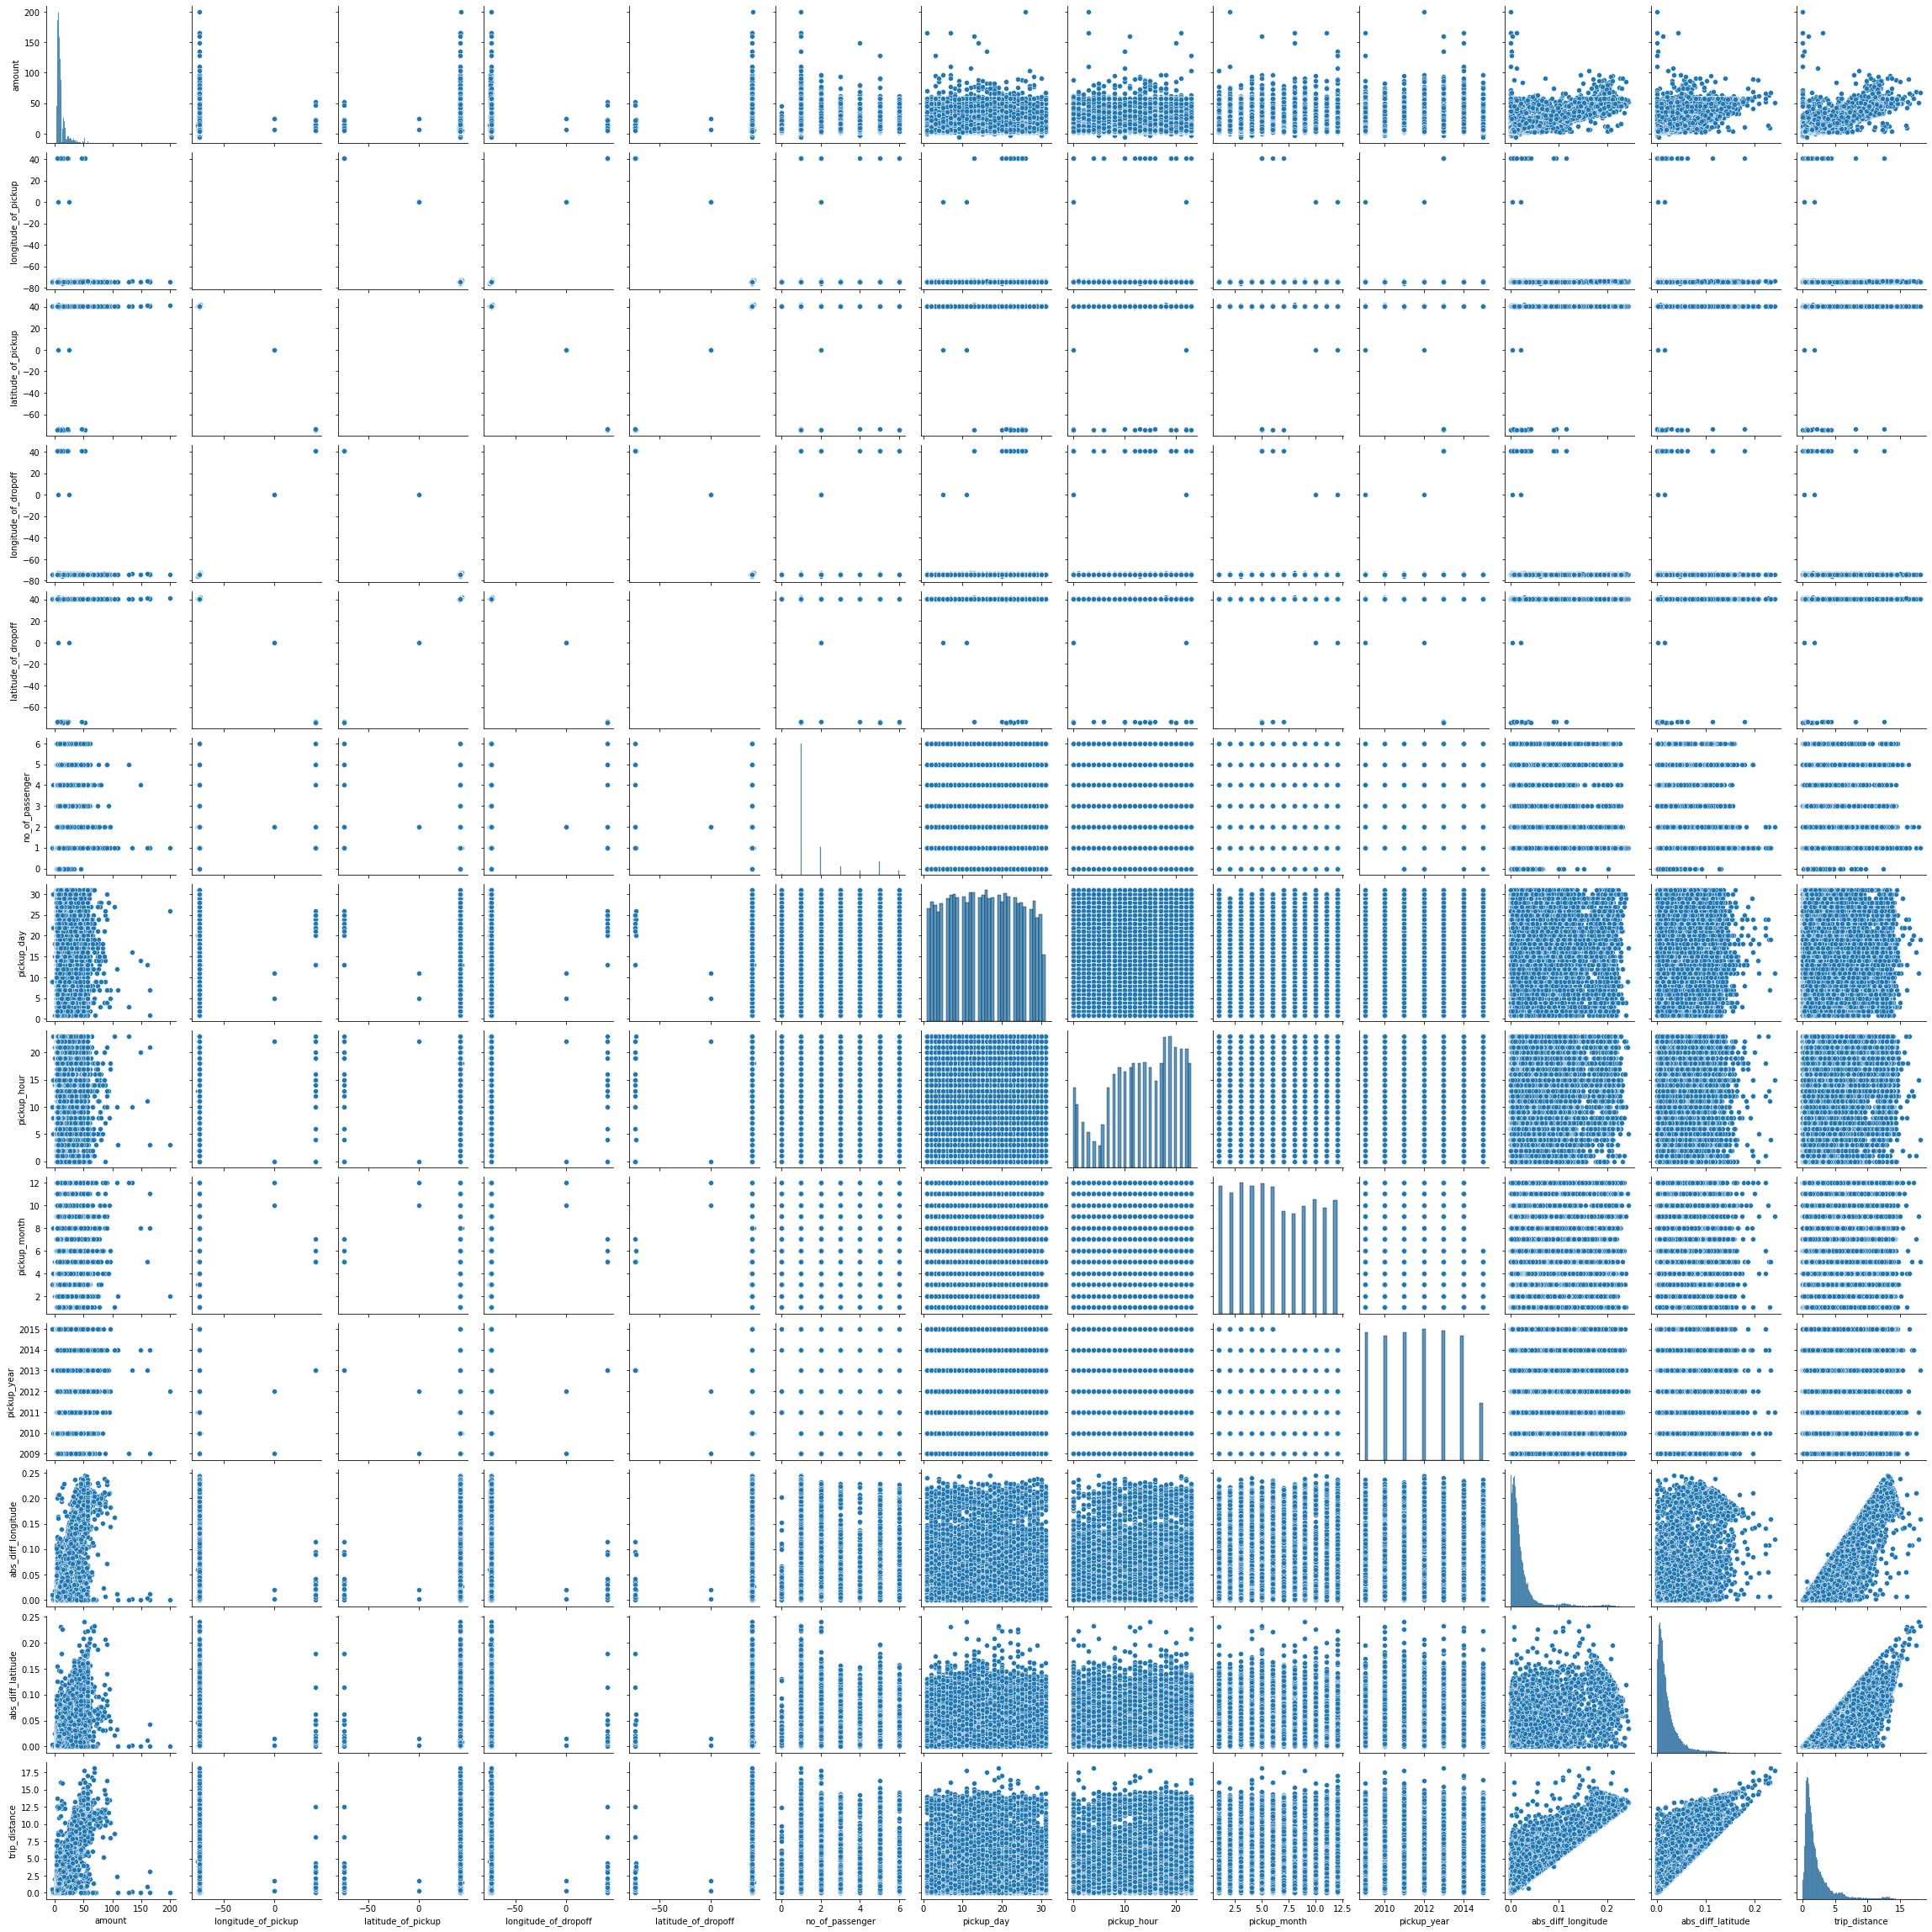

In [29]:
sns.pairplot(data3)

In [30]:
data3.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,abs_diff_longitude,abs_diff_latitude,trip_distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.002701,0.009041,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,0.036780,0.070701,5.250670
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.008504,0.010708,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,0.004437,0.024949,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,0.011440,0.015754,1.242218


In [31]:
data4 = data3.drop(['unique_id','date_time_of_pickup','pickup_day_of_week','pickup_date','pickup_year','abs_diff_longitude', 'abs_diff_latitude'], axis = 1)

In [32]:
data4.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,trip_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,6,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,1,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,8,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,3,1.242218


In [33]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#data4['amount'] = le.fit_transform(data4['amount'])

In [34]:
X = data4.iloc[:,1:]

In [35]:
y = data4['amount'].values

In [36]:
print(X)

       longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0               -73.844311           40.721319            -73.841610   
1               -74.016048           40.711303            -73.979268   
2               -73.982738           40.761270            -73.991242   
3               -73.987130           40.733143            -73.991567   
4               -73.968095           40.768008            -73.956655   
...                    ...                 ...                   ...   
49994           -73.976212           40.744832            -73.981567   
49995           -73.999973           40.748531            -74.016899   
49996           -73.984756           40.768211            -73.987366   
49997           -74.002698           40.739428            -73.998108   
49998           -73.946062           40.777567            -73.953450   

       latitude_of_dropoff  no_of_passenger  pickup_day  pickup_hour  \
0                40.712278                1          15        

In [37]:
print(y.shape)

(48409,)


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36306, 9)
(12103, 9)
(36306,)
(12103,)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [46]:
clf = Pipeline([('std', StandardScaler()),
                #('pca', PCA()),
                ('classifier', RandomForestRegressor())])


In [47]:
clf.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('classifier', RandomForestRegressor())])

In [48]:
clf.score(X_train, y_train)

0.9731214750983244

In [49]:
y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred).round()

17.0

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8065756725871838

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'classifier__n_estimators': [100],
              'classifier__max_depth': [10, 15, 20, 25],
              'classifier__min_samples_split': [2, 3, 4, 5],
              'classifier__min_samples_leaf': [1, 2, 3, 4, 5]
             }

grid_search = GridSearchCV(clf, param_grid, cv=2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('classifier',
                                        RandomForestRegressor())]),
             param_grid={'classifier__max_depth': [10, 15, 20, 25],
                         'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
                         'classifier__min_samples_split': [2, 3, 4, 5],
                         'classifier__n_estimators': [100]})

In [55]:
grid_search.best_params_

{'classifier__max_depth': 25,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 100}

In [56]:
grid_search.score(X_train, y_train)

0.8954815056854225

In [57]:
y_pred_gs = grid_search.predict(X_test)

In [58]:
y_pred_gs

array([37.28926986, 11.39072477, 12.62823854, ..., 20.10710257,
        7.95108823,  4.69099368])

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_gs).round()

17.0

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_gs)

0.8142796950710278

In [61]:
pd.DataFrame({'Real Fare': y_test, 'Predicted Fare': y_pred_gs}).head(10).T

,0,1,2,3,4,5,6,7,8,9
Real Fare,28.90000,8.500000,14.100000,30.000000,12.500000,8.500000,8.500000,5.300000,5.30000,7.300000
Predicted Fare,37.28927,11.390725,12.628239,33.403423,11.653033,8.009174,6.182161,5.566033,4.87216,6.745287


# VIA HYPERTUNING THERE  IS INCREASE IN ACCURACY OF MODEL